In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def founderShareValue(pShare, dLockup, pSuccess, dDilution):
    return pShare * (1 - dLockup) * pSuccess * (1 - dDilution)

In [23]:
# pShare = 10.0
# dLockup = np.random.uniform(0.250, 0.275)
# pSuccessProbability = np.random.uniform(0.75, 0.80)
# pSuccess = np.random.binomial(n = 1, p = pSuccessProbability)
# dDilution = np.random.uniform(0.00, 0.10)

# print("Example (I assume that corresponding parameters are uniformly distributed):\n")
# print(f"P_share: {pShare}")
# print(f"D_lockup: {dLockup:.6f}")
# print(f"P_success probability: {pSuccessProbability:.6f}")
# print(f"P_success: {pSuccess}")
# print(f"D_dilution: {dDilution:.6f}\n")
# print(f"Founder Share Value: {founderShareValue(pShare, dLockup, pSuccess, dDilution):.6f}")

In [24]:
def monteCarlo(sharePriceMean, sharePriceVolatility, dLockup, pSuccessDistributionRangePct, dDilution, numberOfSimulations):
    
    pSuccessProbabilityLow, pSuccessProbabilityHigh = np.array(pSuccessDistributionRangePct) / 100

    logStdDev = np.sqrt(np.log(1 + sharePriceVolatility ** 2))
    logMean = np.log(sharePriceMean) - 0.5 * logStdDev ** 2

    pShare = np.random.lognormal(mean = logMean, sigma = logStdDev, size = numberOfSimulations)
    
    pSuccessProbability = np.random.uniform(pSuccessProbabilityLow, pSuccessProbabilityHigh, numberOfSimulations)
    pSuccess = np.random.binomial(n = 1, p = pSuccessProbability)

    founderValue = founderShareValue(pShare, dLockup, pSuccess, dDilution)

    simulationResults = pd.DataFrame({
        'pShare': pShare,
        'dLockup': dLockup,
        'pSuccessProbability': pSuccessProbability,
        'pSuccess': pSuccess,
        'dDilution': dDilution,
        'founderShareValue': founderValue
    })

    return simulationResults


In [25]:
# Set simulation parameters here

simulationData = monteCarlo(
    sharePriceMean = 10.0,
    sharePriceVolatility = 0.10,
    dLockup = 0.15,
    pSuccessDistributionRangePct = [75.0, 80.0],
    dDilution = 0.0,
    numberOfSimulations = 200000
)

In [26]:
simulationData.head()

,pShare,dLockup,pSuccessProbability,pSuccess,dDilution,founderShareValue
0,9.743216,0.15,0.762611,1,0.0,8.281734
1,10.764941,0.15,0.764652,0,0.0,0.000000
2,11.843125,0.15,0.781292,1,0.0,10.066657
3,9.833596,0.15,0.756436,1,0.0,8.358556
4,9.539694,0.15,0.764261,1,0.0,8.108740


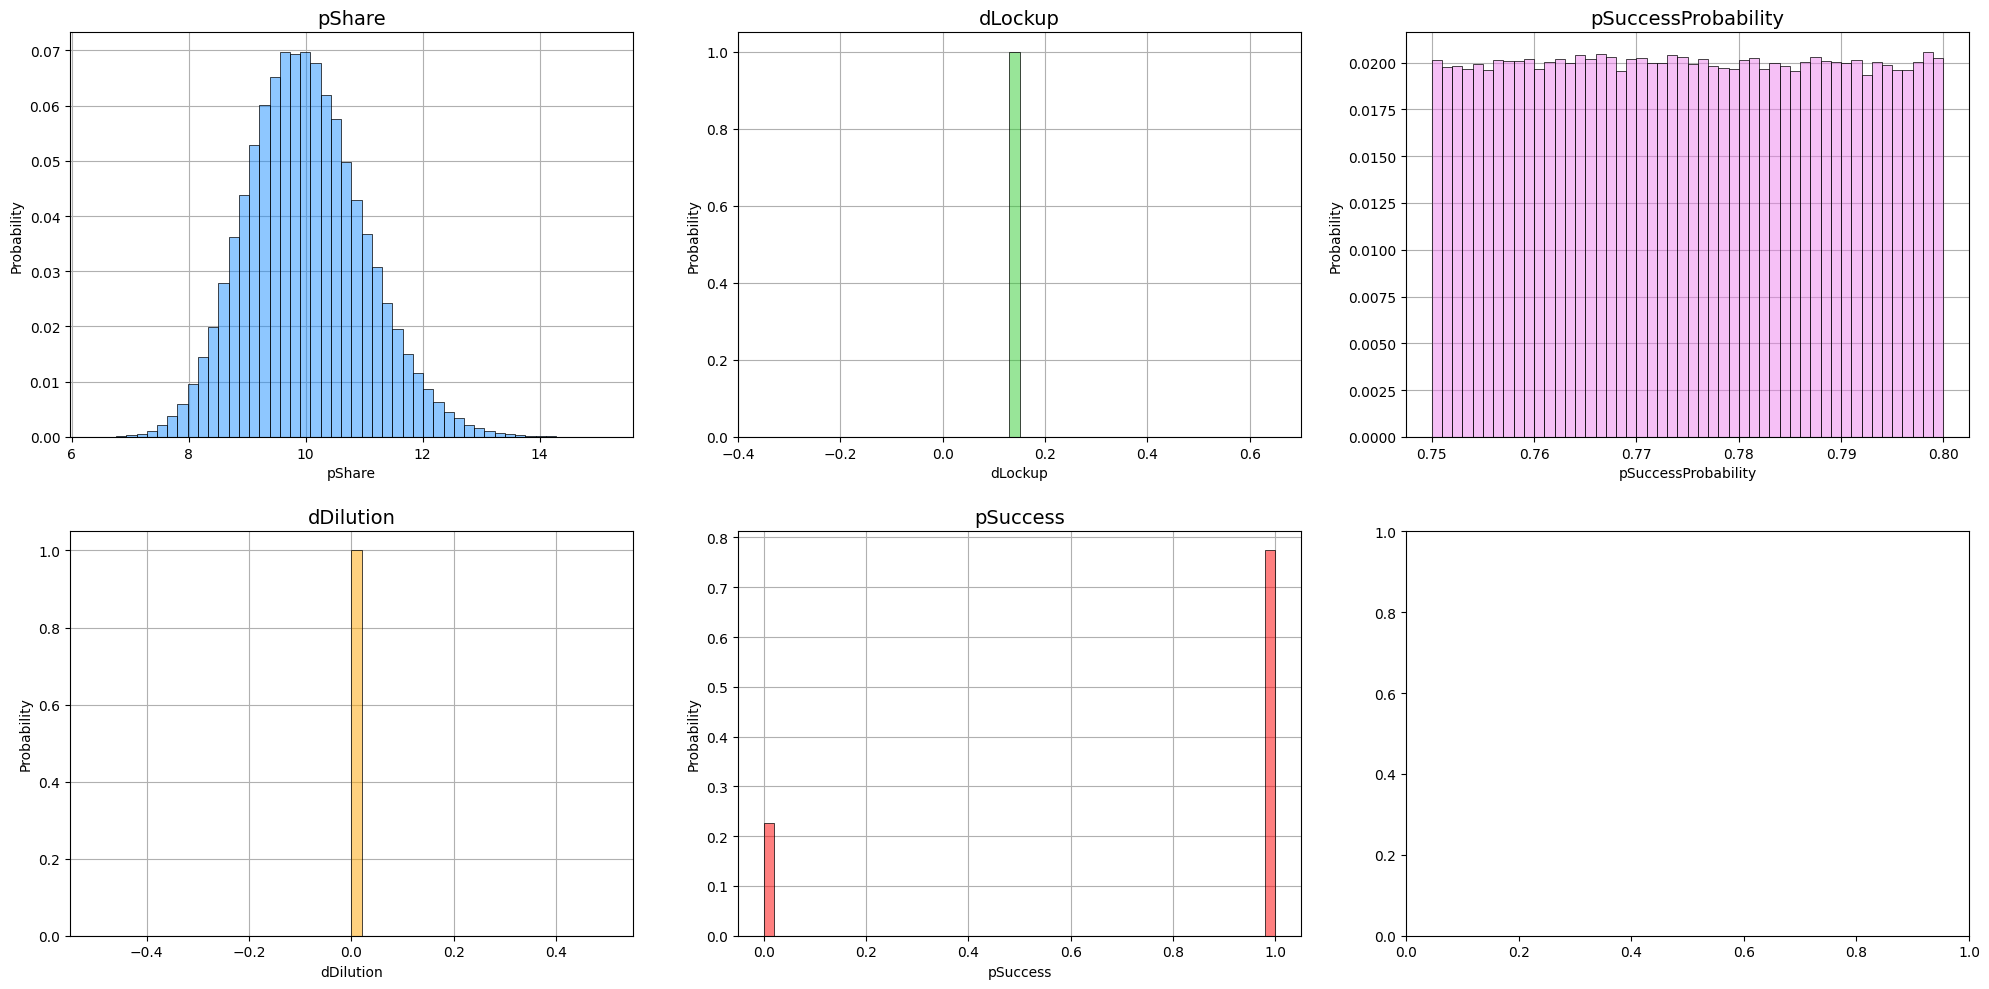

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))
cols = ['pShare', 'dLockup', 'pSuccessProbability', 'dDilution', 'pSuccess']

for ax, col, color in zip(axes.ravel(), cols, ['dodgerblue', 'limegreen', 'violet', 'orange', 'red']):
    sns.histplot(
        data = simulationData,
        x = col,
        bins = 50,
        kde = False,
        color = color,
        edgecolor = 'black',
        linewidth = 0.5,
        alpha = 0.5,
        ax = ax,
        zorder = 2,
        stat = "probability"
    )
    ax.set_title(f'{col}', fontsize = 14)
    ax.grid(True)

plt.tight_layout(h_pad = 2, w_pad = 2)
plt.show()

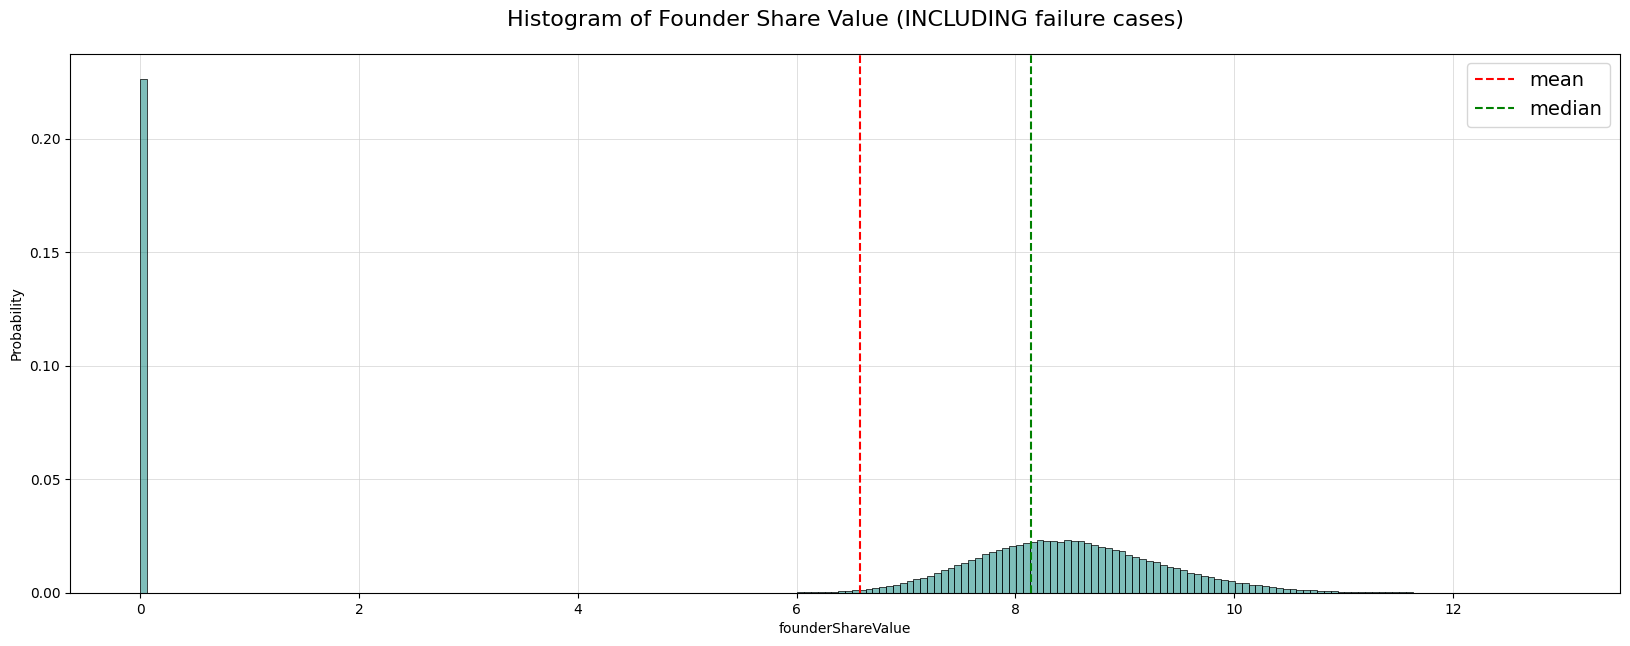

In [28]:
plt.figure(figsize = (20, 7))
sns.histplot(simulationData['founderShareValue'], bins='auto', color = "#007E76", alpha = 0.5, zorder = 2, linewidth = 0.5, stat = 'probability')
plt.axvline(simulationData['founderShareValue'].mean(), color = 'red', linestyle = '--', label = "mean")
plt.axvline(simulationData['founderShareValue'].median(), color = 'green', linestyle = '--', label = "median")
plt.title("Histogram of Founder Share Value (INCLUDING failure cases)", fontsize = 16, pad = 20)
plt.legend(fontsize = 14, frameon = True)
plt.grid(color = "lightgray", linewidth = 0.5)
plt.show()

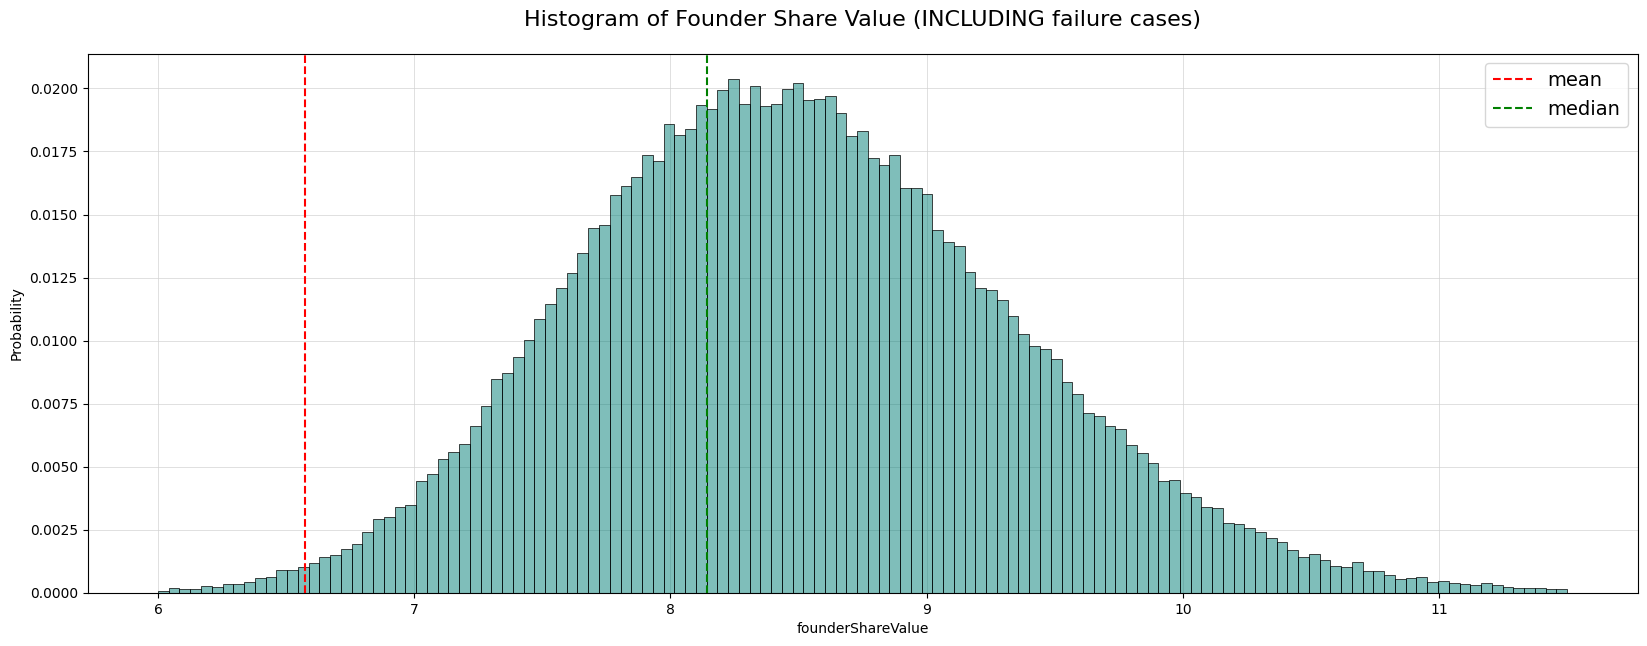

In [29]:
plt.figure(figsize = (20, 7))
sns.histplot(simulationData['founderShareValue'], bins='auto', color = "#007E76", alpha = 0.5, zorder = 2, binrange = [6.0, 11.5], linewidth = 0.5, stat = 'probability')
plt.axvline(simulationData['founderShareValue'].mean(), color = 'red', linestyle = '--', label = "mean")
plt.axvline(simulationData['founderShareValue'].median(), color = 'green', linestyle = '--', label = "median")
plt.title("Histogram of Founder Share Value (INCLUDING failure cases)", fontsize = 16, pad = 20)
plt.legend(fontsize = 14, frameon = True)
plt.grid(color = "lightgray", linewidth = 0.5)
plt.show()

In [30]:
print("Some stats for Founder Share Value:\n")
print(f"Mean: {simulationData['founderShareValue'].mean():.6f}")
print(f"Median: {simulationData['founderShareValue'].median():.6f}")
print(f"Min: {simulationData['founderShareValue'].min():.6f}")
print(f"Max: {simulationData['founderShareValue'].max():.6f}")
print(f"Standard Deviation: {simulationData['founderShareValue'].std():.6f}")
print(f"5% Percentile: {simulationData['founderShareValue'].quantile(0.05):.6f}")
print(f"95% Percentile: {simulationData['founderShareValue'].quantile(0.95):.6f}")

Some stats for Founder Share Value:

Mean: 6.575473
Median: 8.143779
Min: 0.000000
Max: 12.883900
Standard Deviation: 3.632377
5% Percentile: 0.000000
95% Percentile: 9.837247


# Other Version (you can skip this, I guess it's not relevant anymore)

In [31]:
def simulate_founder_share_value(
    n_simulations=100000,
    share_price_mean=10.00,
    volatility=0.10,
    lockup_discount=0.15,
    despac_success_range=(0.80, 0.85),
    dilution_discount=0.00,
    seed=None
):
    if seed is not None:
        np.random.seed(seed)

    # Log-normal parameters from mean and volatility
    log_std_dev = np.sqrt(np.log(1 + volatility ** 2))
    log_mean = np.log(share_price_mean) - 0.5 * log_std_dev ** 2

    # Step 1: Simulate share prices
    simulated_share_prices = np.random.lognormal(
        mean=log_mean,
        sigma=log_std_dev,
        size=n_simulations
    )

    # Step 2: Simulate De-SPAC success probabilities
    simulated_success_probs = np.random.uniform(
        despac_success_range[0],
        despac_success_range[1],
        size=n_simulations
    )

    # Step 3: Compute founder share values
    founder_share_values = (
        simulated_share_prices *
        (1 - lockup_discount) *
        simulated_success_probs *
        (1 - dilution_discount)
    )

    return founder_share_values

In [32]:
def summarize_results(values):
    summary = {
        "mean": np.mean(values),
        "median": np.median(values),
        "min": np.min(values),
        "max": np.max(values),
        "5th_percentile": np.percentile(values, 5),
        "95th_percentile": np.percentile(values, 95)
    }
    return summary

In [33]:
def plot_distribution(values, summary):
    plt.figure(figsize=(20, 6))
    plt.hist(values, bins=100, alpha=0.75, edgecolor='black')
    plt.title('Monte Carlo Simulation of SPAC Founder Share Value')
    plt.xlabel('Founder Share Value (USD)')
    plt.ylabel('Frequency')
    plt.axvline(summary['mean'], color='red', linestyle='--', label=f"Mean = ${summary['mean']:.2f}")
    plt.axvline(summary['median'], color='green', linestyle='--', label=f"Median = ${summary['median']:.2f}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [34]:
# if _name_ == "_main_":
# Run the simulation
results = simulate_founder_share_value(
    n_simulations=100000,
    share_price_mean=10.00,
    volatility=0.10,
    lockup_discount=0.15,
    despac_success_range=(0.80, 0.85),
    dilution_discount=0.00,
    seed=42
)

In [35]:
# Summarize results
summary = summarize_results(results)

# Print key statistics
for k, v in summary.items():
    print(f"{k}: ${v:.2f}")

mean: $7.01
median: $6.98
min: $4.45
max: $10.76
5th_percentile: $5.91
95th_percentile: $8.24


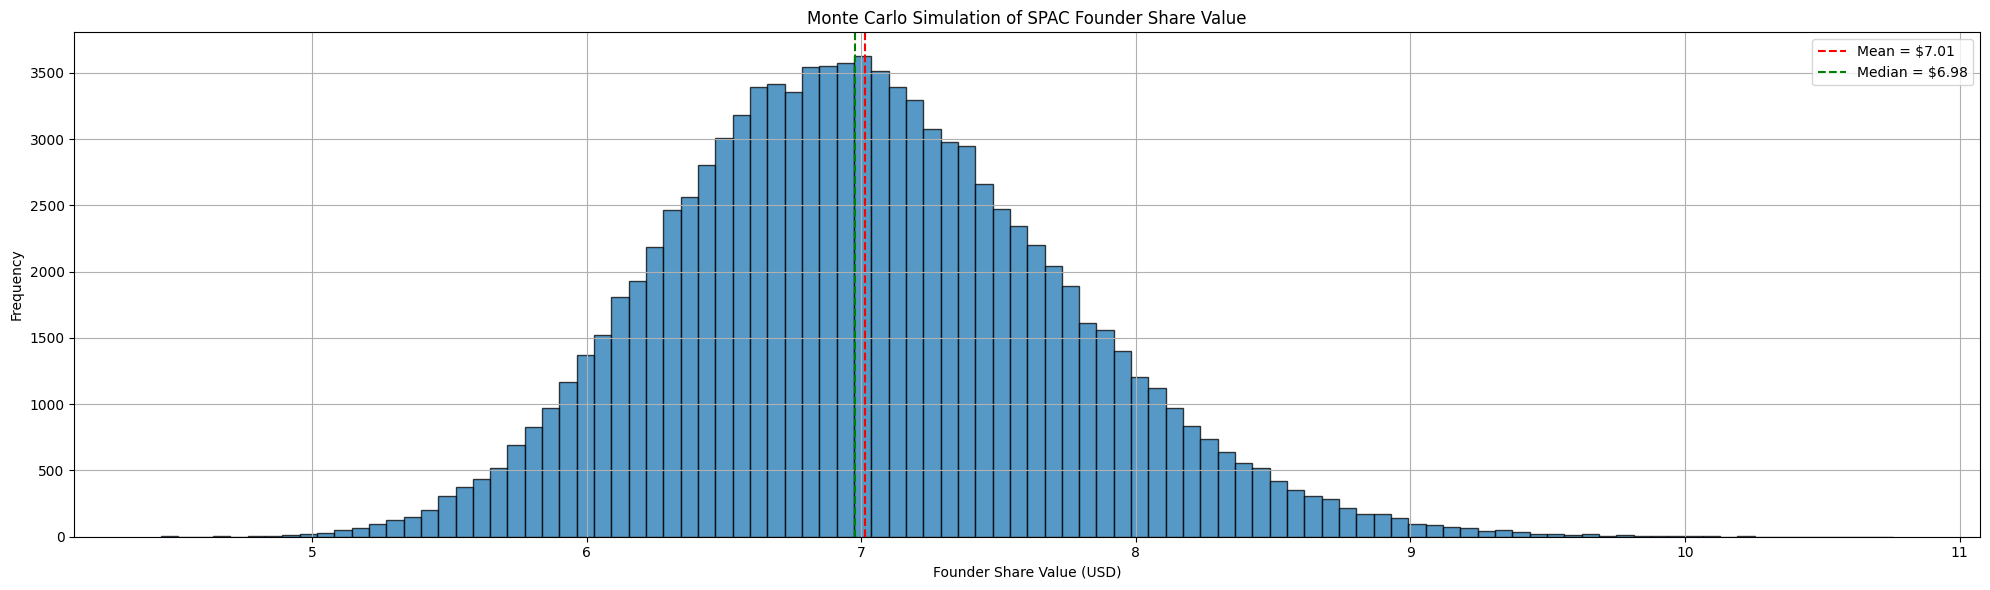

In [36]:
# Plot the distribution
plot_distribution(results, summary)

In [37]:
def simulate_founder_share_value(
    n_simulations=100000,
    share_price_mean=10.00,
    volatility=0.10,
    lockup_discount=0.15,
    despac_success_range=(0.80, 0.85),
    dilution_discount=0.00,
    seed=None
):
    if seed is not None:
        np.random.seed(seed)
    # Log-normal parameters from mean and volatility
    log_std_dev = np.sqrt(np.log(1 + volatility ** 2))
    log_mean = np.log(share_price_mean) - 0.5 * log_std_dev ** 2
    # Step 1: Simulate share prices
    simulated_share_prices = np.random.lognormal(
        mean=log_mean,
        sigma=log_std_dev,
        size=n_simulations
    )
    # Step 2: Simulate De-SPAC success probabilities
    simulated_success_probs = np.random.uniform(
        despac_success_range[0],
        despac_success_range[1],
        size=n_simulations
    )
    # Step 3: Compute founder share values
    founder_share_values = (
        simulated_share_prices *
        (1 - lockup_discount) *
        simulated_success_probs *
        (1 - dilution_discount)
    )
    
    # Create results DataFrame
    simulationResults = pd.DataFrame({
        'pShare': simulated_share_prices,
        'dLockup': np.full(n_simulations, lockup_discount),
        'pSuccessProbability': simulated_success_probs,
        'dDilution': np.full(n_simulations, dilution_discount),
        'founderShareValue': founder_share_values
    })
    
    return simulationResults

In [38]:
# if _name_ == "_main_":
# Run the simulation
results = simulate_founder_share_value(
    n_simulations=100000,
    share_price_mean=10.00,
    volatility=0.10,
    lockup_discount=0.15,
    despac_success_range=(0.80, 0.85),
    dilution_discount=0.00,
    seed=42
)

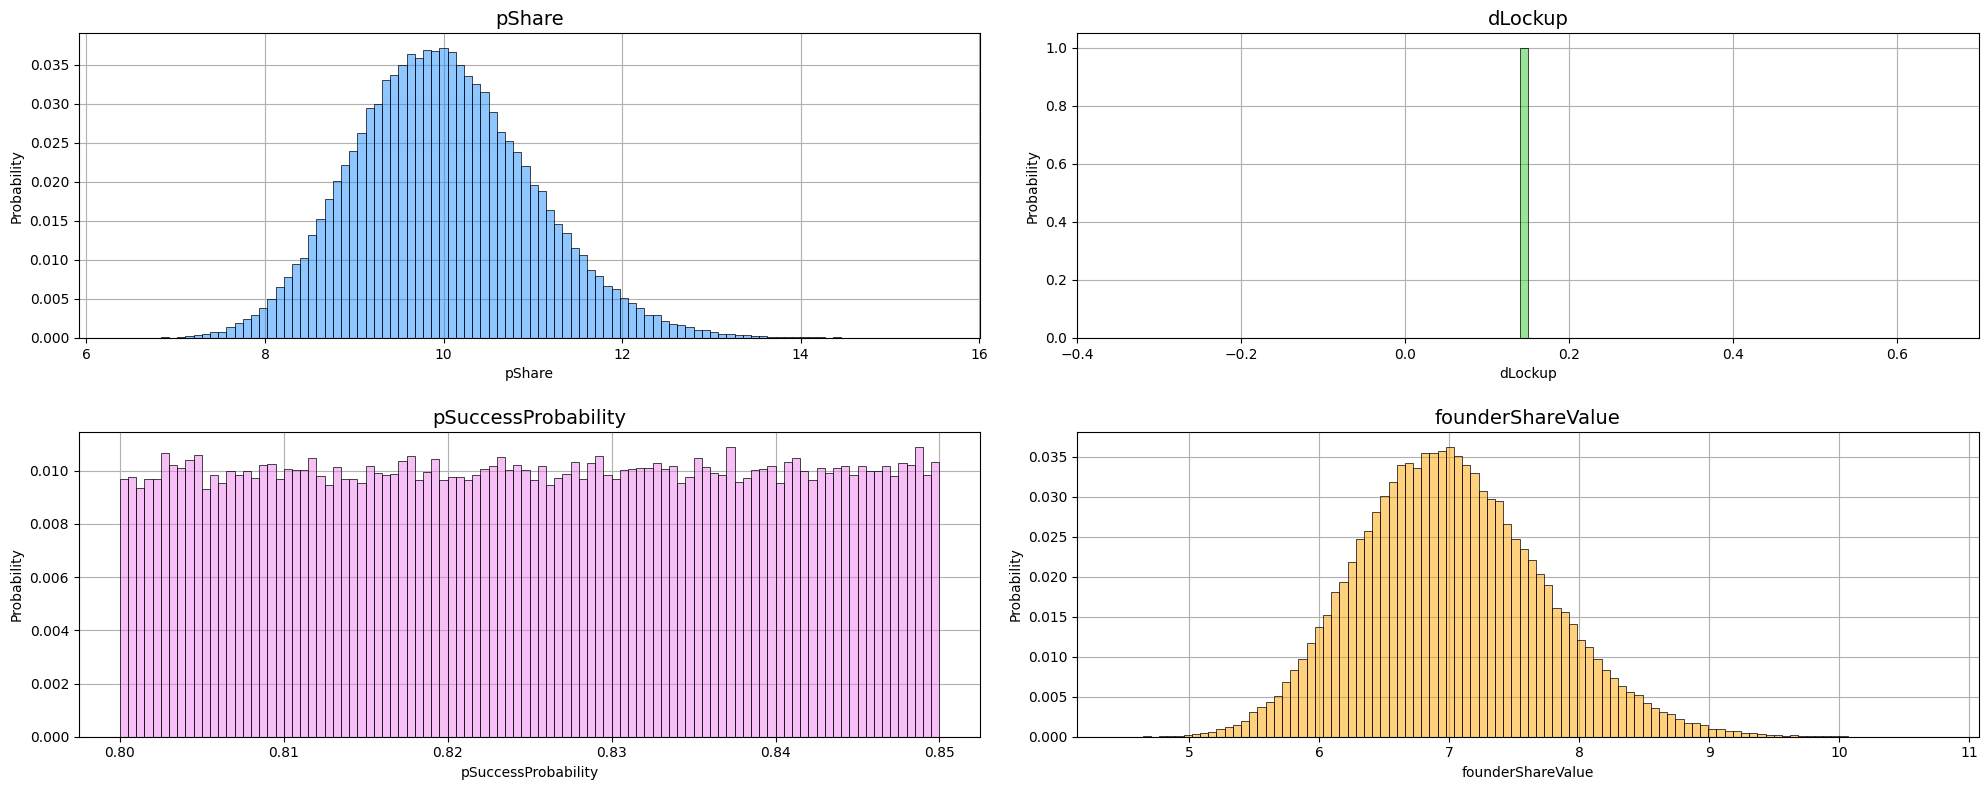

In [39]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 8))
cols = ['pShare', 'dLockup', 'pSuccessProbability', 'founderShareValue']

for ax, col, color in zip(axes.ravel(), cols, ['dodgerblue', 'limegreen', 'violet', 'orange']):
    sns.histplot(
        data = results,
        x = col,
        bins = 100,
        kde = False,
        color = color,
        edgecolor = 'black',
        linewidth = 0.5,
        alpha = 0.5,
        ax = ax,
        zorder = 2,
        stat = "probability"
    )
    ax.set_title(f'{col}', fontsize = 14)
    ax.grid(True)

plt.tight_layout(h_pad = 2, w_pad = 2)
plt.show()

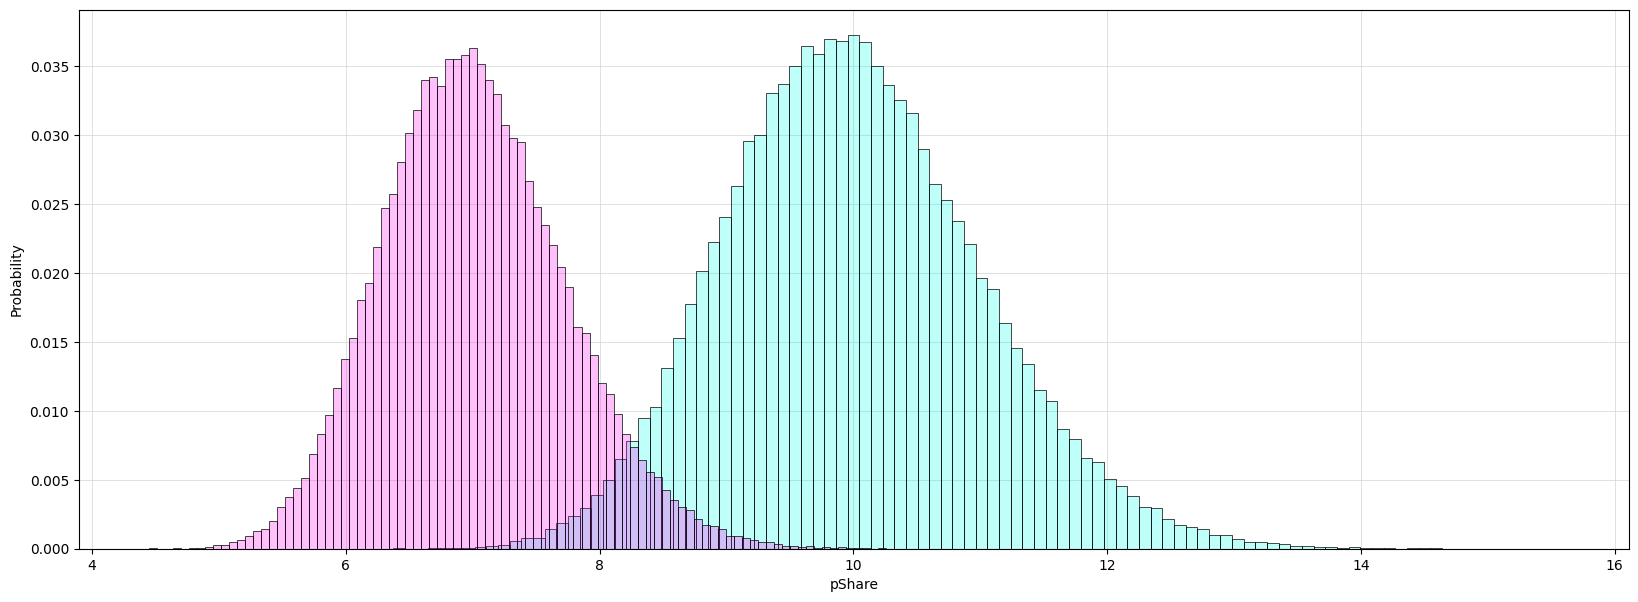

In [40]:
plt.figure(figsize = (20, 7))
sns.histplot(results['pShare'], bins = 100, color = "#00FFEE", alpha = 0.25, zorder = 2, linewidth = 0.5, stat = 'probability')
sns.histplot(results['founderShareValue'], bins = 100, color = "#FF00EE", alpha = 0.25, zorder = 2, linewidth = 0.5, stat = 'probability')
plt.grid(color = "lightgray", linewidth = 0.5)
plt.show()